In [1]:
library(tidyverse)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.8
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



### 타이디 데이터

### 데이터셋을 타이디하게 만드는, 세 가지 규칙
1. 변수마다 해당되는 열이 존재
2. 관측값마다 해당되는 행이 존재
3. 값마다 해당하는 하나의 셀이 있어야 함

In [2]:
table1

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [3]:
table1 %>% mutate(rate = cases / population * 10000)

country,year,cases,population,rate
<chr>,<int>,<int>,<int>,<dbl>
Afghanistan,1999,745,19987071,0.372741
Afghanistan,2000,2666,20595360,1.294466
Brazil,1999,37737,172006362,2.193930
Brazil,2000,80488,174504898,4.612363
China,1999,212258,1272915272,1.667495
China,2000,213766,1280428583,1.669488


In [4]:
table1 %>% count(year, wt = cases)

year,n
<int>,<int>
1999,250740
2000,296920


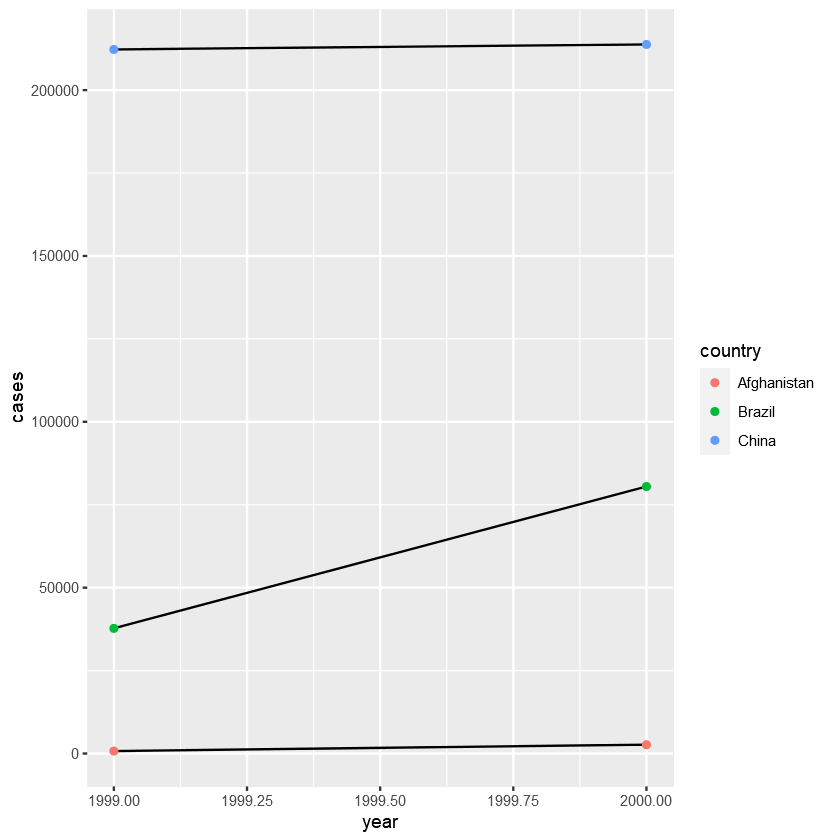

In [5]:
library(ggplot2)
ggplot(table1, aes(year, cases)) + geom_line(aes(group = country)) +
geom_point(aes(color = country))

In [6]:
# 9.2.1
# 연도별, 국가별로 case와 인구수를 추출
a <- table2 %>% filter(type == 'cases') %>%   
rename(cases = count) %>% arrange(country, year)
b <- table2 %>% filter(type == 'population') %>% 
rename(population = count) %>% arrange(country, year)
a; b

country,year,type,cases
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,2000,cases,2666
Brazil,1999,cases,37737
Brazil,2000,cases,80488
China,1999,cases,212258
China,2000,cases,213766


country,year,type,population
<chr>,<int>,<chr>,<int>
Afghanistan,1999,population,19987071
Afghanistan,2000,population,20595360
Brazil,1999,population,172006362
Brazil,2000,population,174504898
China,1999,population,1272915272
China,2000,population,1280428583


In [7]:
# 사례 수를 인구로 나누고 10000을 곱하라
c <- tibble(
  year = a$year,
  country = a$country,
  cases = a$cases,
  population = b$population
) %>%
  mutate(cases_per_cap = (cases / population) * 10000) %>%
  select(country, year, cases_per_cap)
c

country,year,cases_per_cap
<chr>,<int>,<dbl>
Afghanistan,1999,0.372741
Afghanistan,2000,1.294466
Brazil,1999,2.193930
Brazil,2000,4.612363
China,1999,1.667495
China,2000,1.669488


In [8]:
# 적절한 곳에 다시 저장
d <- c %>%
  mutate(type = "cases_per_cap") %>%
  rename(count = cases_per_cap)
d

country,year,count,type
<chr>,<int>,<dbl>,<chr>
Afghanistan,1999,0.372741,cases_per_cap
Afghanistan,2000,1.294466,cases_per_cap
Brazil,1999,2.193930,cases_per_cap
Brazil,2000,4.612363,cases_per_cap
China,1999,1.667495,cases_per_cap
China,2000,1.669488,cases_per_cap


In [9]:
bind_rows(table2, d) %>%
  arrange(country, year, type, count)

country,year,type,count
<chr>,<int>,<chr>,<dbl>
Afghanistan,1999,cases,7.450000e+02
Afghanistan,1999,cases_per_cap,3.727410e-01
Afghanistan,1999,population,1.998707e+07
Afghanistan,2000,cases,2.666000e+03
Afghanistan,2000,cases_per_cap,1.294466e+00
Afghanistan,2000,population,2.059536e+07
Brazil,1999,cases,3.773700e+04
Brazil,1999,cases_per_cap,2.193930e+00
Brazil,1999,population,1.720064e+08


In [10]:
table4c <-
  tibble(
    country = table4a$country,
    `1999` = table4a[["1999"]] / table4b[["1999"]] * 10000,
    `2000` = table4a[["2000"]] / table4b[["2000"]] * 10000
  )
table4c

country,1999,2000
<chr>,<dbl>,<dbl>
Afghanistan,0.372741,1.294466
Brazil,2.193930,4.612363
China,1.667495,1.669488


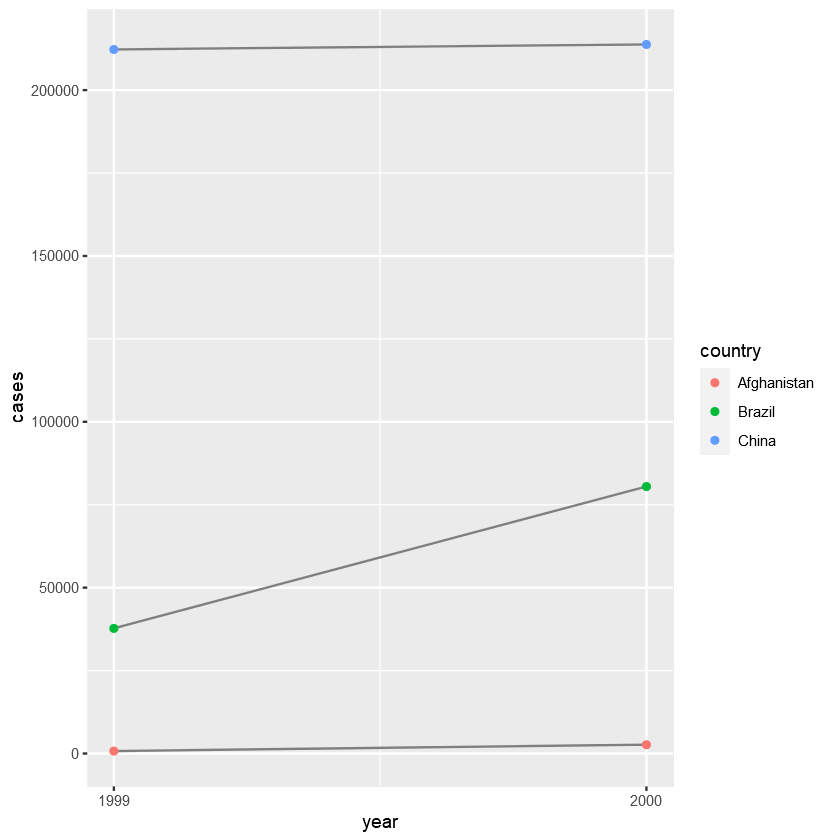

In [11]:
# table2를 사용하여 시간 경과에 따른 사례 수의 변화를 보이는 plot생성
table2 %>%
  filter(type == "cases") %>%
  ggplot(aes(year, count)) +
  geom_line(aes(group = country), colour = "grey50") +
  geom_point(aes(colour = country)) +
  scale_x_continuous(breaks = unique(table2$year)) +
  ylab("cases")

### gather() : 모으기
* 열들에 대해서, 열 이름을 key로, 값들을 새로운 변수로

In [12]:
table4a

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,745,2666
2,Brazil,37737,80488
3,China,212258,213766


In [13]:
table4a %>% gather("1999", "2000", key = "year", value = "cases")

country,year,cases
<chr>,<chr>,<int>
Afghanistan,1999,745
Brazil,1999,37737
China,1999,212258
Afghanistan,2000,2666
Brazil,2000,80488
China,2000,213766


In [14]:
table4b

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,19987071,20595360
2,Brazil,172006362,174504898
3,China,1272915272,1280428583


In [15]:
table4b %>% gather('1999', '2000', key = 'year', value = 'population')

country,year,population
<chr>,<chr>,<int>
Afghanistan,1999,19987071
Brazil,1999,172006362
China,1999,1272915272
Afghanistan,2000,20595360
Brazil,2000,174504898
China,2000,1280428583


### spread() : 펼치기
- 범주형 변수들의 범주를 열로

In [16]:
table2

country,year,type,count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [21]:
table2 %>% spread(key = type, value = count)

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [19]:
# 9.3.3
# 1
stocks <- tibble(
year = c(2015, 2015, 2016, 2016),
half = c(1, 2, 1, 2),
return = c(1.88, 0.59, 0.92, 0.17)) %>% print()

# A tibble: 4 x 3
   year  half return
  <dbl> <dbl>  <dbl>
1  2015     1   1.88
2  2015     2   0.59
3  2016     1   0.92
4  2016     2   0.17


In [23]:
stocks %>% spread(year, return)

half,2015,2016
<dbl>,<dbl>,<dbl>
1,1.88,0.92
2,0.59,0.17


In [24]:
stocks %>% spread(year, return) %>% gather('year', 'return', '2015':'2016')

half,year,return
<dbl>,<chr>,<dbl>
1,2015,1.88
2,2015,0.59
1,2016,0.92
2,2016,0.17


In [26]:
table4a

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,745,2666
2,Brazil,37737,80488
3,China,212258,213766


In [29]:
# 4
preg <- tribble(
~pregnant, ~male, ~female,
"yes", NA, 10,
"no", 20, 12
) %>% print()

# A tibble: 2 x 3
  pregnant  male female
  <chr>    <dbl>  <dbl>
1 yes         NA     10
2 no          20     12


### separate() : 분리 

In [42]:
table3

,country,year,rate
,<chr>,<int>,<chr>
1,Afghanistan,1999,745/19987071
2,Afghanistan,2000,2666/20595360
3,Brazil,1999,37737/172006362
4,Brazil,2000,80488/174504898
5,China,1999,212258/1272915272
6,China,2000,213766/1280428583


In [41]:
# rate열을 /기준으로 분리
table3 %>% separate(rate, into = c("cases", "population"), sep = "/")

country,year,cases,population
<chr>,<int>,<chr>,<chr>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [40]:
table3 %>% separate(rate, into = c("cases", "population"), convert = T)

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [49]:
# year열을 2글자기준으로 century열과 year열로 분리
table3 %>% separate(year, into = c("century", "year"), sep = 2)

country,century,year,rate
<chr>,<chr>,<chr>,<chr>
Afghanistan,19,99,745/19987071
Afghanistan,20,00,2666/20595360
Brazil,19,99,37737/172006362
Brazil,20,00,80488/174504898
China,19,99,212258/1272915272
China,20,00,213766/1280428583


### unite() : 결합 

In [50]:
table5

,country,century,year,rate
,<chr>,<chr>,<chr>,<chr>
1,Afghanistan,19,99,745/19987071
2,Afghanistan,20,00,2666/20595360
3,Brazil,19,99,37737/172006362
4,Brazil,20,00,80488/174504898
5,China,19,99,212258/1272915272
6,China,20,00,213766/1280428583


In [52]:
# century열과 year열을 ""기준으로 결합하여 new열생성
table5 %>% unite(new, century, year, sep = "")

country,new,rate
<chr>,<chr>,<chr>
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


In [ ]:
# 9.4.3
# 1 
tibble(x = c("a,b,c", "d,e,f,g", "h,i,j")) %>%
  separate(x, c("one", "two", "three"))
tibble(x = c("a,b,c", "d,e", "f,g,i")) %>%
  separate(x, c("one", "two", "three"))
tibble(x = c("a,b,c", "d,e,f,g", "h,i,j")) %>%
  separate(x, c("one", "two", "three"))
tibble(x = c("a,b,c", "d,e,f,g", "h,i,j")) %>%
  separate(x, c("one", "two", "three"), extra = "drop") # separate하고 남는 값들은 drop
tibble(x = c("a,b,c", "d,e,f,g", "h,i,j")) %>%
  separate(x, c("one", "two", "three"), extra = "merge") # separate하고 남는 값들은 merge

In [66]:
tibble(x = c("a,b,c", "d,e", "f,g,i")) %>%
  separate(x, c("one", "two", "three"), fill = "right") # 결측값을 오른쪽으로 채움

one,two,three
<chr>,<chr>,<chr>
a,b,c
d,e,NA
f,g,i


In [67]:
tibble(x = c("a,b,c", "d,e", "f,g,i")) %>%
  separate(x, c("one", "two", "three"), fill = "left") # 결측값을 왼쪽으로 채움

one,two,three
<chr>,<chr>,<chr>
a,b,c
NA,d,e
f,g,i


### extract()

In [80]:
# 3
tibble(x = c("X_1", "X_2", "AA_1", "AA_2")) %>%
  separate(x, c("variable", "into"), sep = "_")
tibble(x = c("X1", "X2", "Y1", "Y2")) %>%
  separate(x, c("variable", "into"), sep = 1)

variable,into
<chr>,<chr>
X,1
X,2
AA,1
AA,2


variable,into
<chr>,<chr>
X,1
X,2
Y,1
Y,2


In [79]:
tibble(x = c("X_1", "X_2", "AA_1", "AA_2")) %>%
  extract(x, c("variable", "id"), regex = "([A-Z])_([0-9])")
tibble(x = c("X1", "X2", "Y1", "Y2")) %>%
  extract(x, c("variable", "id"), regex = "([A-Z])([0-9])")
tibble(x = c("X1", "X20", "AA11", "AA2")) %>%
  extract(x, c("variable", "id"), regex = "([A-Z]+)([0-9]+)")

variable,id
<chr>,<chr>
X,1
X,2
A,1
A,2


variable,id
<chr>,<chr>
X,1
X,2
Y,1
Y,2


variable,id
<chr>,<chr>
X,1
X,20
AA,11
AA,2


In [81]:
tibble(variable = c("X", "X", "Y", "Y"), id = c(1, 2, 1, 2)) %>%
  unite(x, variable, id, sep = "_")

x
<chr>
X_1
X_2
Y_1
Y_2


### 결측값
- 명시적 결측값 : NA로 표시
- 암묵적 결측값 : 단순히 데이터에 존재하지 않음

In [83]:
stocks <- tibble(
year = c(2015, 2015, 2015, 2015, 2016, 2016, 2016),
qtr = c(1, 2, 3, 4, 2, 3, 4),
return = c(1.88, 0.59, 0.35, NA, 0.92, 0.17, 2.66)) %>% print()

# A tibble: 7 x 3
   year   qtr return
  <dbl> <dbl>  <dbl>
1  2015     1   1.88
2  2015     2   0.59
3  2015     3   0.35
4  2015     4  NA   
5  2016     2   0.92
6  2016     3   0.17
7  2016     4   2.66


- 명시적 결측값 : 2015년 4분기
- 암묵적 결측값 : 2016년 1분기

In [84]:
# 암묵적 결측값을 명시적 결측값으로
stocks %>% spread(year, return)

qtr,2015,2016
<dbl>,<dbl>,<dbl>
1,1.88,NA
2,0.59,0.92
3,0.35,0.17
4,NA,2.66


In [85]:
stocks %>% spread(year, return) %>% gather(year, return, '2015':'2016', na.rm = T)

qtr,year,return
<dbl>,<chr>,<dbl>
1,2015,1.88
2,2015,0.59
3,2015,0.35
2,2016,0.92
3,2016,0.17
4,2016,2.66


### complete() : 결측값을 명시적으로 표현

In [86]:
stocks %>% complete(year, qtr)

year,qtr,return
<dbl>,<dbl>,<dbl>
2015,1,1.88
2015,2,0.59
2015,3,0.35
2015,4,NA
2016,1,NA
2016,2,0.92
2016,3,0.17
2016,4,2.66


### fill() : 결측값을 최근값으로 대체

In [88]:
treatment <- tribble(
    ~person, ~treatment, ~response,
    "Darrick Whitmore", 1, 7,
    NA, 2, 10,
    NA, 3, 9,
    "Katherine Burke", 1, 4
) %>% print()

# A tibble: 4 x 3
  person           treatment response
  <chr>                <dbl>    <dbl>
1 Darrick Whitmore         1        7
2 NA                       2       10
3 NA                       3        9
4 Katherine Burke          1        4


In [89]:
treatment %>% fill(person)

person,treatment,response
<chr>,<dbl>,<dbl>
Darrick Whitmore,1,7
Darrick Whitmore,2,10
Darrick Whitmore,3,9
Katherine Burke,1,4


In [103]:
# 9.5.1
#1
stocks %>% 
 complete(year, qtr, 
          fill = list(return = mean(stocks$return, na.rm = T))) 
# 결측값을 0으로 대체

year,qtr,return
<dbl>,<dbl>,<dbl>
2015,1,1.880
2015,2,0.590
2015,3,0.350
2015,4,1.095
2016,1,1.095
2016,2,0.920
2016,3,0.170
2016,4,2.660


### 사례연구

In [110]:
who %>% head()

country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Afghanistan,AF,AFG,1980,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1981,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1982,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1983,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1984,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1985,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [118]:
who1 <- who %>% gather(
    new_sp_m014:newrel_f65, key = "key", value = "cases", na.rm = T
) %>% print()

# A tibble: 76,046 x 6
   country     iso2  iso3   year key         cases
   <chr>       <chr> <chr> <int> <chr>       <int>
 1 Afghanistan AF    AFG    1997 new_sp_m014     0
 2 Afghanistan AF    AFG    1998 new_sp_m014    30
 3 Afghanistan AF    AFG    1999 new_sp_m014     8
 4 Afghanistan AF    AFG    2000 new_sp_m014    52
 5 Afghanistan AF    AFG    2001 new_sp_m014   129
 6 Afghanistan AF    AFG    2002 new_sp_m014    90
 7 Afghanistan AF    AFG    2003 new_sp_m014   127
 8 Afghanistan AF    AFG    2004 new_sp_m014   139
 9 Afghanistan AF    AFG    2005 new_sp_m014   151
10 Afghanistan AF    AFG    2006 new_sp_m014   193
# ... with 76,036 more rows


In [122]:
who2 <- who1 %>% 
mutate(key = stringr::str_replace(key, "newrel", "new_rel")) %>% print()

# A tibble: 76,046 x 6
   country     iso2  iso3   year key         cases
   <chr>       <chr> <chr> <int> <chr>       <int>
 1 Afghanistan AF    AFG    1997 new_sp_m014     0
 2 Afghanistan AF    AFG    1998 new_sp_m014    30
 3 Afghanistan AF    AFG    1999 new_sp_m014     8
 4 Afghanistan AF    AFG    2000 new_sp_m014    52
 5 Afghanistan AF    AFG    2001 new_sp_m014   129
 6 Afghanistan AF    AFG    2002 new_sp_m014    90
 7 Afghanistan AF    AFG    2003 new_sp_m014   127
 8 Afghanistan AF    AFG    2004 new_sp_m014   139
 9 Afghanistan AF    AFG    2005 new_sp_m014   151
10 Afghanistan AF    AFG    2006 new_sp_m014   193
# ... with 76,036 more rows


In [123]:
who3 <- who2 %>% separate(key, c("new", "type", "sexage"), sep = "_") %>% print()

# A tibble: 76,046 x 8
   country     iso2  iso3   year new   type  sexage cases
   <chr>       <chr> <chr> <int> <chr> <chr> <chr>  <int>
 1 Afghanistan AF    AFG    1997 new   sp    m014       0
 2 Afghanistan AF    AFG    1998 new   sp    m014      30
 3 Afghanistan AF    AFG    1999 new   sp    m014       8
 4 Afghanistan AF    AFG    2000 new   sp    m014      52
 5 Afghanistan AF    AFG    2001 new   sp    m014     129
 6 Afghanistan AF    AFG    2002 new   sp    m014      90
 7 Afghanistan AF    AFG    2003 new   sp    m014     127
 8 Afghanistan AF    AFG    2004 new   sp    m014     139
 9 Afghanistan AF    AFG    2005 new   sp    m014     151
10 Afghanistan AF    AFG    2006 new   sp    m014     193
# ... with 76,036 more rows


In [126]:
who3 %>% count(new)

new,n
<chr>,<int>
new,76046


In [132]:
who4 <- who3 %>% select(-c("new", "iso2", "iso3")) %>% print()

# A tibble: 76,046 x 5
   country      year type  sexage cases
   <chr>       <int> <chr> <chr>  <int>
 1 Afghanistan  1997 sp    m014       0
 2 Afghanistan  1998 sp    m014      30
 3 Afghanistan  1999 sp    m014       8
 4 Afghanistan  2000 sp    m014      52
 5 Afghanistan  2001 sp    m014     129
 6 Afghanistan  2002 sp    m014      90
 7 Afghanistan  2003 sp    m014     127
 8 Afghanistan  2004 sp    m014     139
 9 Afghanistan  2005 sp    m014     151
10 Afghanistan  2006 sp    m014     193
# ... with 76,036 more rows


In [133]:
who5 <- who4 %>% separate(sexage, c("sex", "age"), sep = 1) %>% print()

# A tibble: 76,046 x 6
   country      year type  sex   age   cases
   <chr>       <int> <chr> <chr> <chr> <int>
 1 Afghanistan  1997 sp    m     014       0
 2 Afghanistan  1998 sp    m     014      30
 3 Afghanistan  1999 sp    m     014       8
 4 Afghanistan  2000 sp    m     014      52
 5 Afghanistan  2001 sp    m     014     129
 6 Afghanistan  2002 sp    m     014      90
 7 Afghanistan  2003 sp    m     014     127
 8 Afghanistan  2004 sp    m     014     139
 9 Afghanistan  2005 sp    m     014     151
10 Afghanistan  2006 sp    m     014     193
# ... with 76,036 more rows


`summarise()` has grouped output by 'country', 'year'. You can override using the `.groups` argument.


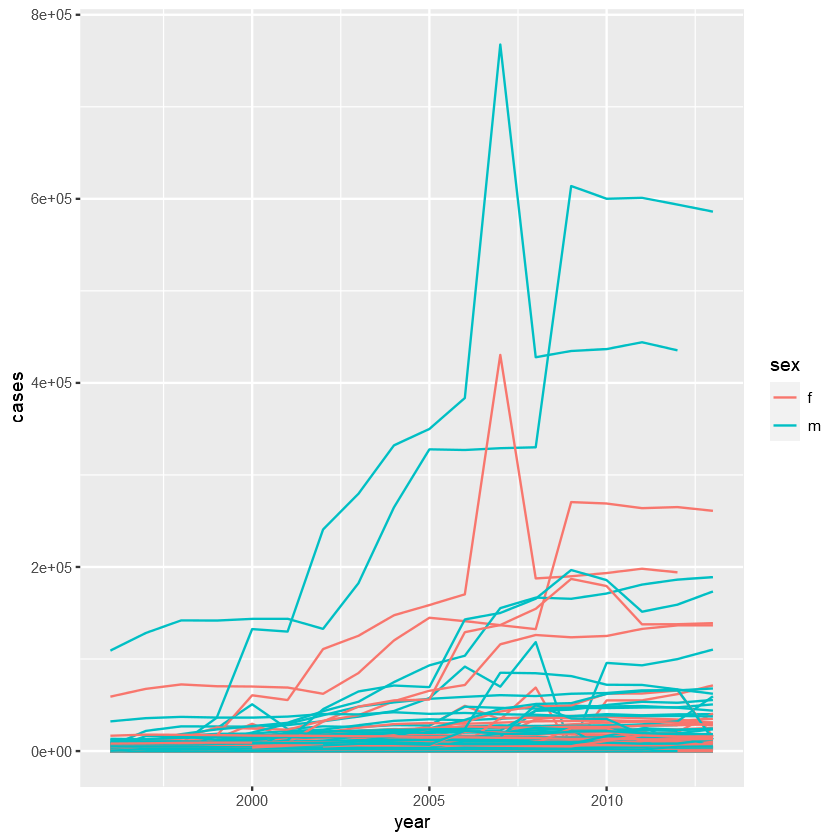

In [134]:
who5 %>%
  group_by(country, year, sex) %>%
  filter(year > 1995) %>%
  summarise(cases = sum(cases)) %>%
  unite(country_sex, country, sex, remove = FALSE) %>%
  ggplot(aes(x = year, y = cases, group = country_sex, colour = sex)) +
  geom_line()